# Definição do problema



- Equação para conversão: **T(°F) = T(°C) × 9/5 + 32**

# Etapa 1: Importação das bibliotecas

In [41]:
import tensorflow as tf
tf.__version__

'2.8.0'

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Etapa 2: Importação da base de dados

In [43]:
df = pd.read_csv('Celsius-to-Fahrenheit.csv')
#temperature_df.reset_index(drop = True, inplace = True)

In [44]:
df.head()

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     30 non-null     int64  
 1   Fahrenheit  30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [46]:
df.describe()

,Celsius,Fahrenheit
count,30.000000,30.000000
mean,2.000000,35.600000
std,22.780815,41.005466
min,-50.000000,-58.000000
25%,-6.750000,19.850000
50%,0.500000,32.900000
75%,7.750000,45.950000
max,60.000000,140.000000


# Etapa 3: Visualização da base de dados

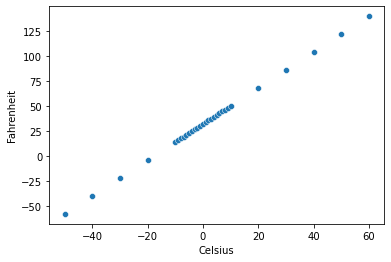

In [47]:
sns.scatterplot(x=df['Celsius'], y=df['Fahrenheit']);

# Etapa 4: Configuração da base de dados de treinamento

In [48]:
X_train = df['Celsius']
y_train = df['Fahrenheit']

In [49]:
X_train.shape == y_train.shape

True

# Etapa 5: Construção e treinamento do modelo

In [50]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 1, input_shape = [1]))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [72]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.2), loss = 'mean_squared_error')

In [73]:
epochs_hist = model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 239ms/step - loss: 0.0013
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 20.0971
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 1.3101
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 4.2859
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 11.5605
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 8.7531
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 2.5147
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0107
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 2.4301
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 5.4577
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - loss: 5.3479
Epoch 12/100
1/1 [==============================] - 0s 5ms/step - loss: 2.7203
Epoch 13/100
1/1 [==============================] - 0s 5m

# Etapa 5: Avaliação do modelo

In [74]:
epochs_hist.history.keys()

dict_keys(['loss'])

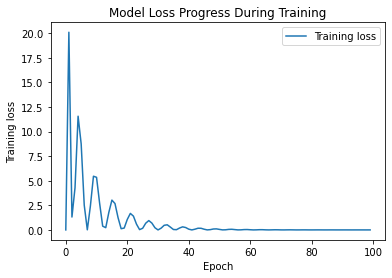

In [75]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training loss')
plt.legend(['Training loss']);

In [76]:
model.get_weights()

[array([[1.8009993]], dtype=float32), array([32.001], dtype=float32)]

## Consideração

- Rede encontra o valor de w1 = 1.8 e bias = 32 assim como na formula original
>**T(°F) = T(°C) × 9/5 + 32**


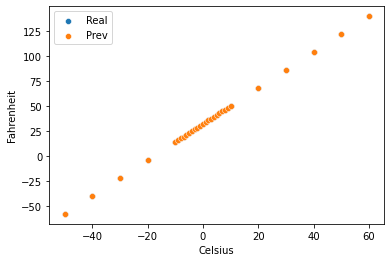

In [77]:
sns.scatterplot(x=df['Celsius'], y=df['Fahrenheit'])

y_pred = model.predict(X_train)
x_new = np.linspace(-50,60,30)

sns.scatterplot(x = X_train, y = y_pred.ravel())
plt.legend(labels=["Real","Prev"]);
#Sobrepossição 